In [31]:
# imports
import boundarytools
import os
import json
import numpy as np

In [32]:
# load country boundaries
#url = 'https://www.geoboundaries.org/data/geoBoundariesCGAZ-3_0_0/ADM0/simplifyRatio_10/geoBoundariesCGAZ_ADM0.geojson'
#geoj = boundarytools.utils.load_geojson_url(url)
with open('data/gb-countries-simple.json', encoding='utf8') as r:
    geoj = json.loads(r.read())

In [33]:
def get_country_level_stats(iso, level):
    # open stats
    try:
        path = 'global_stats/{}-ADM{}-stats.json'.format(iso, level)
        with open(path) as r:
            stats = json.loads(r.read())
    except:
        return None
    # get all sources
    sources = set()
    for src,stats2 in stats.items():
        sources.add(src)
        for src2 in stats2.keys():
            sources.add(src2)
    # create arrays
    '''
    shape = len(sources),len(sources)
    emat = np.empty(shape)
    wmat = np.empty(shape)
    cmat = np.empty(shape)
    for i,src in enumerate(sources):
        stats2 = stats.get(src, None)
        for i2,src2 in enumerate(sources):
            try:
                simil = stats2[src2]
            except:
                simil = None
            if simil:
                emat[i,i2] = simil['equality']
                wmat[i,i2] = simil['within']
                cmat[i,i2] = simil['contains']
    return emat,wmat,cmat
    '''
    tables = {}
    for metric in ['equality','within','contains']:
        table = []
        for source1 in sources:
            row = []
            for source2 in sources:
                try:
                    val = stats[source1][source2][metric]
                except:
                    val = 0
                row.append(val)
            table.append(row)
        table = np.array(table)
        #print(metric)
        #print(table)
        tables[metric] = table
    return tables
def calc_prob(matrices):
    probmat = matrices['equality'] * matrices['within']
    rowtots = []
    for row in probmat:
        vals = [v for v in row if v != 0] # exclude 0, same as weird error
        rowtot = np.mean(vals)
        rowtots.append(rowtot)
    tottot = np.mean(rowtots)
    return tottot
# collect for each level
for f in geoj['features']:
    props = f['properties']
    iso = props['shapeISO']
    for level in range(0, 4+1):
        mats = get_country_level_stats(iso, level)
        if mats:
            props['prob{}'.format(level)] = calc_prob(mats)
        else:
            props['prob{}'.format(level)] = None

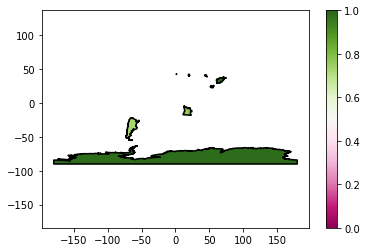

In [35]:
# visualize country probs
fig = boundarytools.utils.show_dataset(geoj, color_by='prob1')

In [36]:
import matplotlib
print(matplotlib.__version__)

3.4.2
